#### [우울증 관련 분석]
- 데이터셋:2018~2022 시군구 성별 연령별 주요 정신질환 통계
- 성별 및 연령별 우울증 발병 관련 데이터 분석
- 과정
    * 데이터파일 확인 
        - 첫번째 줄이 컬럼명 맞는지 확인 
        - 불필요한 컬럼이나 행이 있는지 확인
        - 결측치 정도 확인
    * 데이터 전처리 : 데이터 정리 및 손질
        - 파일 확인 후 체크한 사항 진행
        - 결측치 처리
        - 이상치 처리
        - 중복데이터 처리
        - 형변환 => 실제 데이터와 타입 일치
    * 데이터 가공 : 분석하고자 하는 데이터 형태   
        - 행인덱스 처리 : 멀티인덱스 / 컬럼 => 행인덱스/행인덱스 초기화
        - 필요한 컬럼 & 행 추출
        - 추가적인 결측치/이상치/중복데이터 처리
        - 형변환 => 연속형 -> 범주형, 범주형 -> 연속형
    * 데이터 분석
        - 탐색적 분석 : 주어진 데이터를 기반으로 의미를 찾아내는 것
        - 시각화 및 분석 결과 텍스트 요약 정리    

#### [1] 준비과정 : 모듈, 데이터

In [38]:
# [1-1] 모듈 로딩
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [39]:
# [1-2] 데이터 준비
File1=r'C:\Users\kdp\Desktop\KDW\EX_PANDAS06\DAY09\시군구 성별 연령별 주요 정실질환 통계 2018~2022.csv'


In [40]:
# [1-3] DATA ==> DataFrame 형태 저장
dataDF=pd.read_csv(File1 , encoding='cp949')

In [41]:
# [1-4] 한글폰트
from matplotlib import font_manager as fm, rc


Font_File=r'C:\Windows\Fonts\malgun.ttf'


font_name=fm.FontProperties(fname=Font_File).get_name()


rc('font',family=font_name)

- [2] 데이터 확인 : 행과 컬럼수, 실제데이터와 컬럼 타입, 결측치 체크

In [42]:
# [2-1] 기본정보 확인 => info(), describe()
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165000 entries, 0 to 164999
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   진료년도    165000 non-null  int64 
 1   상별구분    165000 non-null  object
 2   시도      165000 non-null  object
 3   시군구     165000 non-null  object
 4   성별      165000 non-null  object
 5   연령구분    165000 non-null  object
 6   환자수     165000 non-null  int64 
 7   입내원일수   165000 non-null  int64 
 8   요양급여비용  165000 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 11.3+ MB


In [43]:
dataDF.describe(include='all')

,진료년도,상별구분,시도,시군구,성별,연령구분,환자수,입내원일수,요양급여비용
count,165000.000000,165000,165000,165000,165000,165000,165000.000000,165000.000000,1.650000e+05
unique,NaN,6,17,249,2,11,NaN,NaN,NaN
top,NaN,ADHD,경기,고성군,남,0~9세,NaN,NaN,NaN
freq,NaN,27500,27720,1320,82500,15000,NaN,NaN,NaN
mean,2020.000000,NaN,NaN,NaN,NaN,NaN,86.157673,621.043145,3.860845e+07
std,1.414218,NaN,NaN,NaN,NaN,NaN,193.002516,1406.831330,1.029413e+08
min,2018.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000e+00
25%,2019.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000e+00
50%,2020.000000,NaN,NaN,NaN,NaN,NaN,10.000000,21.000000,3.747500e+05
75%,2021.000000,NaN,NaN,NaN,NaN,NaN,79.000000,618.000000,3.038176e+07


In [44]:
# [2-3] 실제데이터 info()에서 확인한 타입 비교
dataDF.head(), dataDF.tail()

(   진료년도  상별구분  시도  시군구 성별    연령구분   환자수  입내원일수     요양급여비용
 0  2018  ADHD  서울  강남구  남    0~9세   437   3330  188836790
 1  2018  ADHD  서울  강남구  남  10~19세  1111   8869  563498480
 2  2018  ADHD  서울  강남구  남  20~29세   456   3485  213248290
 3  2018  ADHD  서울  강남구  남  30~39세   174   1357   72761750
 4  2018  ADHD  서울  강남구  남  40~49세    55    357   21611080,
         진료년도 상별구분  시도  시군구 성별     연령구분  환자수  입내원일수    요양급여비용
 164995  2022  조현병  세종  세종시  여   60~69세   29    597  40381390
 164996  2022  조현병  세종  세종시  여   70~79세   13    550  39400730
 164997  2022  조현병  세종  세종시  여   80~89세    0      0         0
 164998  2022  조현병  세종  세종시  여   90~99세    0      0         0
 164999  2022  조현병  세종  세종시  여  100세 이상    0      0         0)

- [3] 데이터 전처리 
    * 기본확인 파악된 내용들 처리
    * 불필요 데이터 삭제 : 0번행 삭제
    * 결측치 데이터 처리 : '전출지별' 컬럼 처리
    * 이상치 데이터 처리 : '-'에 대한 처리
    * 데이터 자료형 일치 : 형변환

In [45]:
# [3-1] 결측치 데이터 확인
dataDF.isna().sum()

진료년도      0
상별구분      0
시도        0
시군구       0
성별        0
연령구분      0
환자수       0
입내원일수     0
요양급여비용    0
dtype: int64

In [46]:
# [3-2] 컬럼이 '우울증'인 행만 추출
copyDF=dataDF[dataDF['상별구분']=='우울증']
copyDF

,진료년도,상별구분,시도,시군구,성별,연령구분,환자수,입내원일수,요양급여비용
82500,2018,우울증,서울,강남구,남,0~9세,17,143,6089540
82501,2018,우울증,서울,강남구,남,10~19세,563,5125,341371930
82502,2018,우울증,서울,강남구,남,20~29세,1555,11045,733848570
82503,2018,우울증,서울,강남구,남,30~39세,1372,8814,566378520
82504,2018,우울증,서울,강남구,남,40~49세,1200,7944,472023980
...,...,...,...,...,...,...,...,...,...
109995,2022,우울증,세종,세종시,여,60~69세,522,3240,176751500
109996,2022,우울증,세종,세종시,여,70~79세,292,1959,95748080
109997,2022,우울증,세종,세종시,여,80~89세,131,743,32449070
109998,2022,우울증,세종,세종시,여,90~99세,0,0,0


In [47]:
# [3-3] 우울증만 추출했으므로 우울증 열은 제거
copyDF=copyDF.drop('상별구분', axis=1)
copyDF

,진료년도,시도,시군구,성별,연령구분,환자수,입내원일수,요양급여비용
82500,2018,서울,강남구,남,0~9세,17,143,6089540
82501,2018,서울,강남구,남,10~19세,563,5125,341371930
82502,2018,서울,강남구,남,20~29세,1555,11045,733848570
82503,2018,서울,강남구,남,30~39세,1372,8814,566378520
82504,2018,서울,강남구,남,40~49세,1200,7944,472023980
...,...,...,...,...,...,...,...,...
109995,2022,세종,세종시,여,60~69세,522,3240,176751500
109996,2022,세종,세종시,여,70~79세,292,1959,95748080
109997,2022,세종,세종시,여,80~89세,131,743,32449070
109998,2022,세종,세종시,여,90~99세,0,0,0


In [48]:
# [3-4] 요양급여비용은 다루지 않을 것이기 때문에 삭제
copyDF=copyDF.drop('요양급여비용',axis=1)
copyDF

,진료년도,시도,시군구,성별,연령구분,환자수,입내원일수
82500,2018,서울,강남구,남,0~9세,17,143
82501,2018,서울,강남구,남,10~19세,563,5125
82502,2018,서울,강남구,남,20~29세,1555,11045
82503,2018,서울,강남구,남,30~39세,1372,8814
82504,2018,서울,강남구,남,40~49세,1200,7944
...,...,...,...,...,...,...,...
109995,2022,세종,세종시,여,60~69세,522,3240
109996,2022,세종,세종시,여,70~79세,292,1959
109997,2022,세종,세종시,여,80~89세,131,743
109998,2022,세종,세종시,여,90~99세,0,0


In [49]:
# [3-5] 입내원일수 역시 필요하지 않아서 삭제
copyDF=copyDF.drop('입내원일수',axis=1)
copyDF

,진료년도,시도,시군구,성별,연령구분,환자수
82500,2018,서울,강남구,남,0~9세,17
82501,2018,서울,강남구,남,10~19세,563
82502,2018,서울,강남구,남,20~29세,1555
82503,2018,서울,강남구,남,30~39세,1372
82504,2018,서울,강남구,남,40~49세,1200
...,...,...,...,...,...,...
109995,2022,세종,세종시,여,60~69세,522
109996,2022,세종,세종시,여,70~79세,292
109997,2022,세종,세종시,여,80~89세,131
109998,2022,세종,세종시,여,90~99세,0


In [50]:
# [3-6] 연도별, 시도별, 성별, 연령별로 환자수를 더해서 표를 다시 구성
dataDF2=copyDF.groupby(['진료년도','시도','성별','연령구분'])['환자수'].sum().reset_index()
# 잘 되었는지 확인
dataDF2.head()

,진료년도,시도,성별,연령구분,환자수
0,2018,강원,남,0~9세,0
1,2018,강원,남,100세 이상,0
2,2018,강원,남,10~19세,481
3,2018,강원,남,20~29세,1163
4,2018,강원,남,30~39세,776


In [51]:
dataDF2.tail()

,진료년도,시도,성별,연령구분,환자수
1865,2022,충북,여,50~59세,3166
1866,2022,충북,여,60~69세,4500
1867,2022,충북,여,70~79세,3310
1868,2022,충북,여,80~89세,2137
1869,2022,충북,여,90~99세,140


In [52]:
# 새로 만든 데이터베이스 정보 확인
dataDF2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1870 entries, 0 to 1869
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   진료년도    1870 non-null   int64 
 1   시도      1870 non-null   object
 2   성별      1870 non-null   object
 3   연령구분    1870 non-null   object
 4   환자수     1870 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 73.2+ KB


#### [4] 분석

In [53]:
# [4-1] 성별 환자수 보기
sDF= dataDF2.groupby(['성별'])['환자수'].sum()
sDF

성별
남    1539661
여    3180546
Name: 환자수, dtype: int64

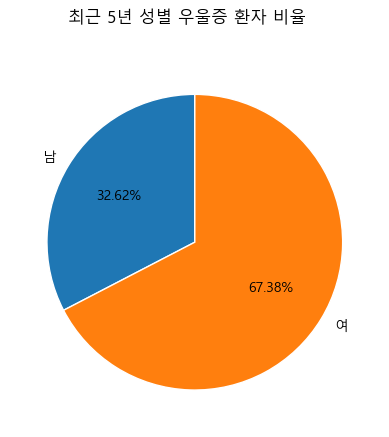

In [54]:
# 원형그래프로 그리기
plt.pie(sDF, labels=['남','여'], autopct='%.2f%%', startangle=90, wedgeprops={'linewidth':1, 'edgecolor':'white'})
plt.suptitle('최근 5년 성별 우울증 환자 비율')
plt.show()

In [55]:
# 이거는 여성의 산후우울증, 갱년기의 이유인 듯하니 연령별 비교도 같이 해보자
# 원그래프로 만들어볼까
saDF=dataDF2.groupby(['성별','연령구분'])['환자수'].sum().reset_index()
saDF

,성별,연령구분,환자수
0,남,0~9세,3543
1,남,100세 이상,0
2,남,10~19세,103094
3,남,20~29세,285753
4,남,30~39세,220202
5,남,40~49세,222392
6,남,50~59세,215619
7,남,60~69세,216714
8,남,70~79세,183545
9,남,80~89세,85398


In [56]:
# 100세 이상 부분이 0이라 삭제하자
saDF=saDF.drop([1,12])
saDF

,성별,연령구분,환자수
0,남,0~9세,3543
2,남,10~19세,103094
3,남,20~29세,285753
4,남,30~39세,220202
5,남,40~49세,222392
6,남,50~59세,215619
7,남,60~69세,216714
8,남,70~79세,183545
9,남,80~89세,85398
10,남,90~99세,3401


In [57]:
# 남,여 그래프를 따로 그리자
saDF_man=saDF.iloc[:10]
saDF_woman=saDF.iloc[10:]
saDF_man

,성별,연령구분,환자수
0,남,0~9세,3543
2,남,10~19세,103094
3,남,20~29세,285753
4,남,30~39세,220202
5,남,40~49세,222392
6,남,50~59세,215619
7,남,60~69세,216714
8,남,70~79세,183545
9,남,80~89세,85398
10,남,90~99세,3401


In [58]:
# 연령구분 열을 보기 좋게 값을 변경하는 함수를 만들어보자

def convert_age_group(age_range):
    if '0~9세' in age_range:
        return '10세 미만'
    elif '10~19세' in age_range:
        return '10대'
    elif '20~29세' in age_range:
        return '20대'
    elif '30~39세' in age_range:
        return '30대'
    elif '40~49세' in age_range:
        return '40대'
    elif '50~59세' in age_range:
        return '50대'
    elif '60~69세' in age_range:
        return '60대'
    elif '70~79세' in age_range:
        return '70대'
    elif '80~89세' in age_range:
        return '80대'
    elif '90~99세' in age_range:
        return '90대'
    else:
        return '기타'

# 연령구분 변환 적용
saDF_man['연령구분'] = saDF_man['연령구분'].apply(convert_age_group)
saDF_man

C:\Users\kdp\AppData\Local\Temp\ipykernel_23992\1942808965.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  saDF_man['연령구분'] = saDF_man['연령구분'].apply(convert_age_group)


,성별,연령구분,환자수
0,남,10세 미만,3543
2,남,10대,103094
3,남,20대,285753
4,남,30대,220202
5,남,40대,222392
6,남,50대,215619
7,남,60대,216714
8,남,70대,183545
9,남,80대,85398
10,남,90대,3401


In [59]:
# 남자만 뽑는 거니 성별을 날리자
saDF_man=saDF_man.drop('성별',axis=1)

In [60]:
saDF_man

,연령구분,환자수
0,10세 미만,3543
2,10대,103094
3,20대,285753
4,30대,220202
5,40대,222392
6,50대,215619
7,60대,216714
8,70대,183545
9,80대,85398
10,90대,3401


In [61]:
# 여자 데이터도 손질하자
saDF_woman=saDF_woman.drop('성별', axis=1)

In [62]:
# 연령구분 변환 적용
saDF_woman['연령구분'] = saDF_woman['연령구분'].apply(convert_age_group)
saDF_woman

,연령구분,환자수
11,10세 미만,1593
13,10대,180269
14,20대,521319
15,30대,440540
16,40대,414725
17,50대,454719
18,60대,513579
19,70대,429057
20,80대,208700
21,90대,16045


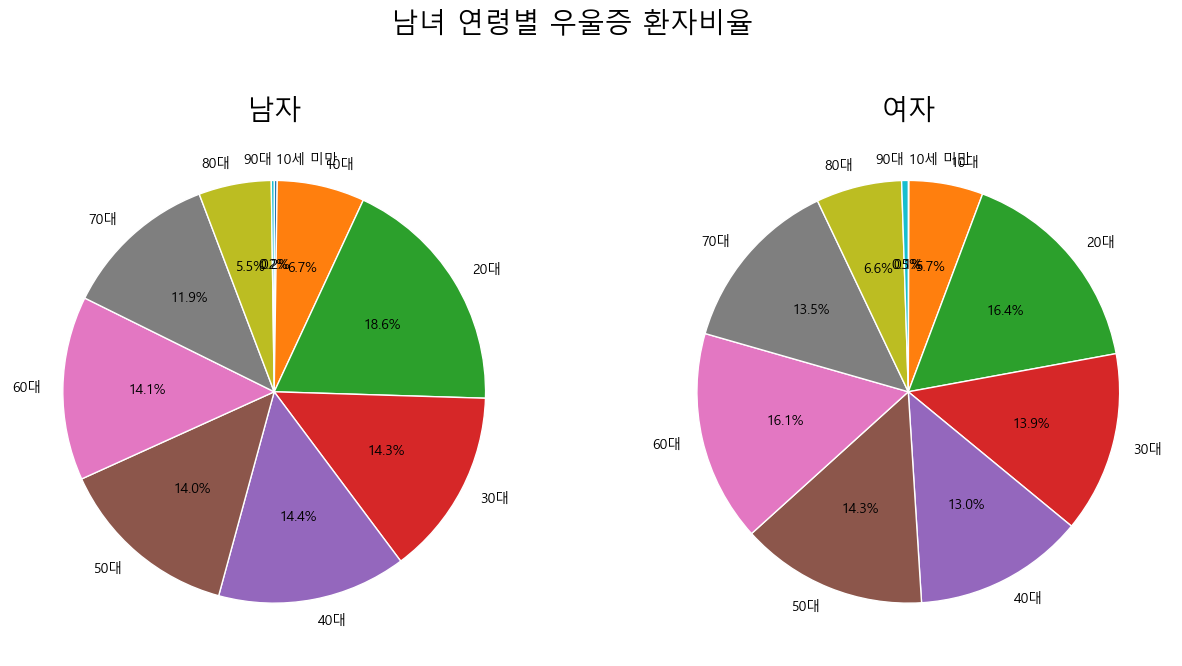

In [63]:
# 원그래프를 그리자
fig=plt.figure(figsize=(15,15))
fig.suptitle('남녀 연령별 우울증 환자비율', fontsize=20, y=0.75)
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
ax1.pie(saDF_man['환자수'], labels=saDF_man['연령구분'],autopct='%.1f%%', startangle=90,counterclock=False,wedgeprops={'linewidth':1, 'edgecolor':'white'})
ax2.pie(saDF_woman['환자수'], labels=saDF_woman['연령구분'],autopct='%.1f%%',startangle=90,counterclock=False,wedgeprops={'linewidth':1, 'edgecolor':'white'})
ax1.set_title('남자', loc='center', fontsize=20)
ax2.set_title('여자', loc='center', fontsize=20)
plt.show()

In [64]:
# 남자는 20대에, 여자는 20대,60대에 우울증 발병률이 가장 높다!

In [65]:
# [4-2] 연도별, 지역별 환자수 분석
yr_DF= dataDF2.groupby(['진료년도','시도'])['환자수'].sum()
yr_DF.head(20)

진료년도  시도
2018  강원     23963
      경기    177934
      경남     36935
      경북     34773
      광주     23663
      대구     44773
      대전     28105
      부산     66697
      서울    203283
      세종      4062
      울산     14506
      인천     45713
      전남     19820
      전북     27789
      제주     11987
      충남     35491
      충북     27117
2019  강원     25570
      경기    191929
      경남     38222
Name: 환자수, dtype: int64

In [66]:
yr_DF1=yr_DF.loc[[2018,2019,2020,2021,2022],['광주','대구','대전','부산','서울','세종','울산','인천','제주']]
yr_DF2=yr_DF.loc[[2018,2019,2020,2021,2022],['강원','경기','경남','경북','전남','전북','충남','충북']]

In [67]:
# 다중막대그래프

# X축 데이터
Year=(2018,2019,2020,2021,2022)

In [68]:
# Y축 데이터
regional_patient1={'광주':(yr_DF1.loc[:,'광주']), '대구':(yr_DF1.loc[:,'대구']), '대전':(yr_DF1.loc[:,'대전']),
                   '부산':(yr_DF1.loc[:,'부산']), '서울':(yr_DF1.loc[:,'서울']), '세종': (yr_DF1.loc[:,'세종']),
                   '울산':(yr_DF1.loc[:,'울산']), '인천':(yr_DF1.loc[:,'인천']), '제주':(yr_DF1.loc[:,'제주']),
                   }
regional_patient2={'강원':(yr_DF2.loc[:,'강원']),'경기':(yr_DF2.loc[:,'경기']),'경남':(yr_DF2.loc[:,'경남']),
                   '경북':(yr_DF2.loc[:,'경북']),'전남':(yr_DF2.loc[:,'전남']),'전북':(yr_DF2.loc[:,'전북']),
                   '충남':(yr_DF2.loc[:,'충남']),'충북':(yr_DF2.loc[:,'충북']),
                   }

In [69]:
# 그래프에 나타낼 x축 위치 값, 막대그래프 너비, 다중 막대그래프 간격 값
x = np.arange(len(Year))  
width = 0.09 # 막대 넓이
multiplier = 0      # 막대그래프 간격

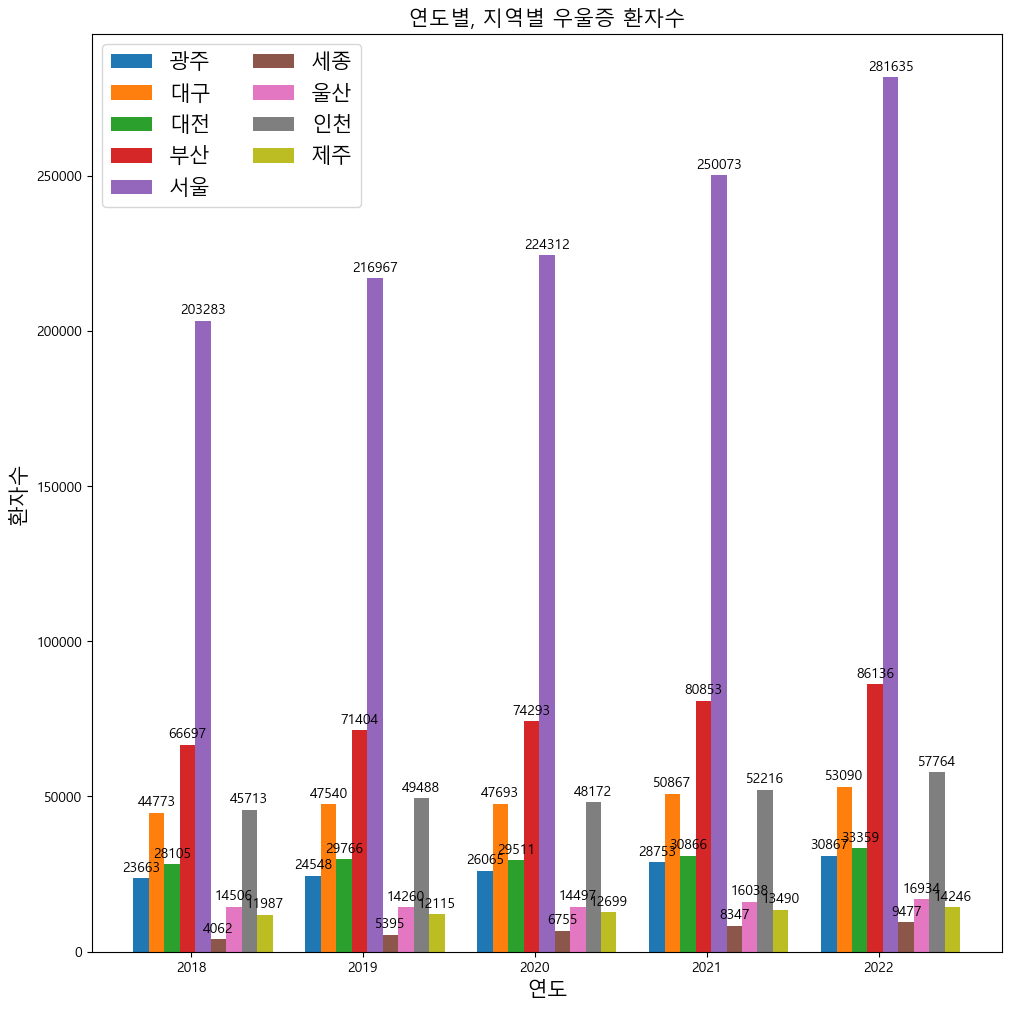

In [70]:
# 연도별 지역별 환자수 비교 다중그래프1
fig, ax = plt.subplots(layout='constrained', figsize=(10,10))

# 막대 그리기
for region, patient in regional_patient1.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, patient, width, label=region)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('연도', fontsize=15)
ax.set_ylabel('환자수', fontsize=15)
ax.set_title('연도별, 지역별 우울증 환자수', fontsize=15)
ax.set_xticks(x + width+0.2, Year)
ax.legend(loc='upper left', ncols=2, fontsize=15)


plt.show()

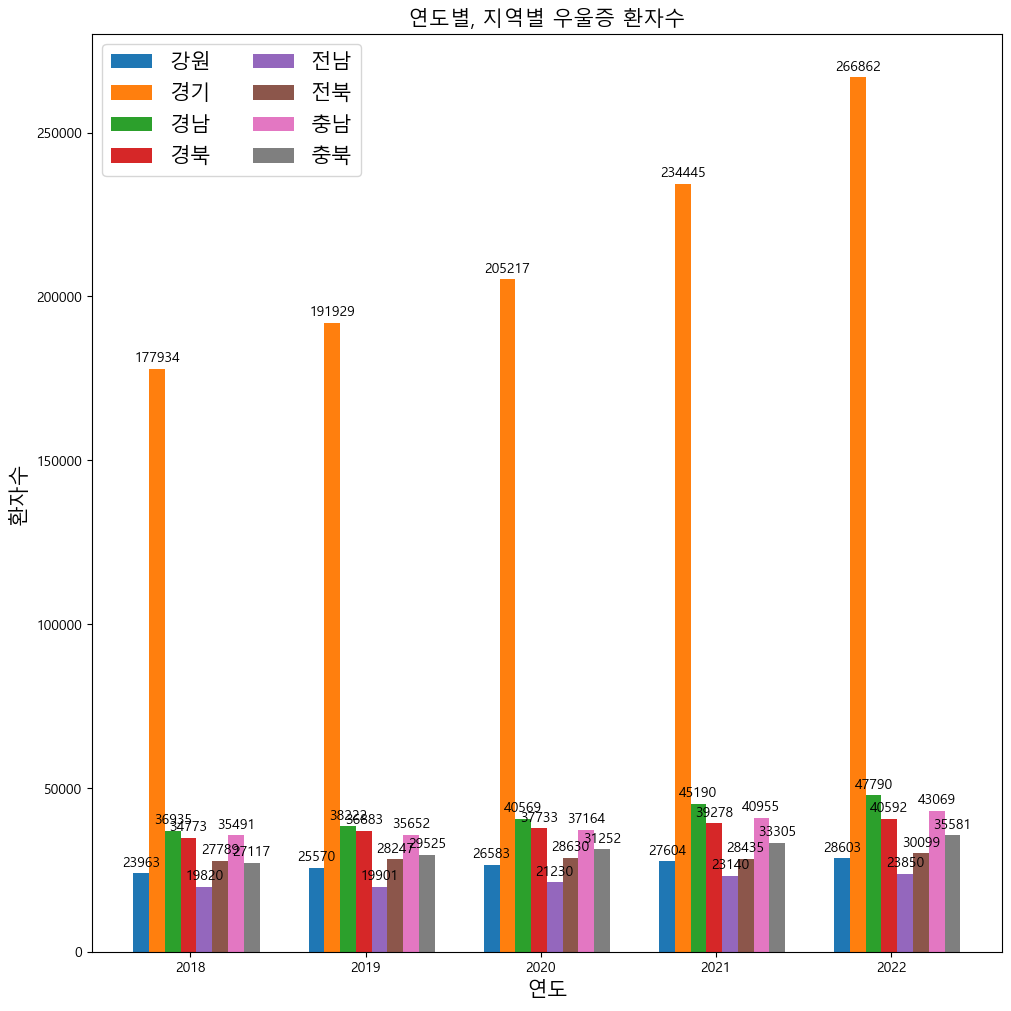

In [71]:
# 연도별 지역별 환자수 비교 다중그래프2
fig, ax = plt.subplots(layout='constrained', figsize=(10,10))

# 막대 그리기
for region, patient in regional_patient2.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, patient, width, label=region)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('연도', fontsize=15)
ax.set_ylabel('환자수', fontsize=15)
ax.set_title('연도별, 지역별 우울증 환자수', fontsize=15)
ax.set_xticks(x + width+1,Year)
ax.legend(loc='upper left', ncols=2, fontsize=15)


plt.show()

In [72]:
# 서울, 경기가 압도적으로 환자수가 많고, 전반적으로 환자 수가 증가하는 추세